In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")

In [16]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,temp,wind
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,-4.0,0.0,0.0,49.0,0.0,0.0,0,dome,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,-3.0,0.0,0.0,38.0,0.0,0.0,0,outdoors,80.0,12.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,-6.0,0.0,0.0,37.0,0.0,0.0,1,outdoors,78.0,12.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,9.0,0.0,0.0,43.0,0.0,0.0,0,outdoors,67.0,10.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,-3.0,0.0,0.0,45.5,0.0,0.0,1,dome,0.0,0.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,5.5,0.0,0.0,49.0,0.0,0.0,0,outdoors,76.0,8.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,3.5,0.0,0.0,38.0,0.0,0.0,1,dome,0.0,0.0
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,7.0,0.0,0.0,44.5,0.0,0.0,1,outdoors,73.0,5.0
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,-3.0,0.0,0.0,37.0,0.0,0.0,1,outdoors,75.0,3.0
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,9.5,0.0,0.0,42.0,0.0,0.0,0,dome,0.0,0.0


In [17]:
df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [18]:
df1 = df.iloc[6460]
df1

away_team                       LAC
away_score                     28.0
home_team                       MIN
home_score                     24.0
location                       Home
home_winning_margin            -4.0
total                          52.0
overtime                        0.0
away_rest                         7
home_rest                        10
away_moneyline               -110.0
home_moneyline               -110.0
spread_line                     1.0
away_spread_odds             -115.0
home_spread_odds             -105.0
total_line                     54.0
under_odds                   -110.0
over_odds                    -110.0
div_game                          0
indoor_game                       1
temp                            0.0
wind                            0.0
home_win                          0
over_totals_win                   0
over_winning_margin            -2.0
home_spread_win                   0
home_spread_winning_margin     -5.0
Name: 6460, dtype: object

In [19]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,...,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,20.060332,22.328891,2.268558,42.389223,0.058899,7.473345,7.515621,58.180138,-92.628977,2.282531,...,-57.279736,0.377472,0.246489,40.120952,5.904987,0.542992,0.465033,-1.148682,0.470335,-0.013972
std,10.662743,11.068656,14.336087,16.336923,0.235453,1.982782,2.092829,242.422769,277.724551,5.893971,...,69.812454,0.484789,0.430997,30.232845,5.983662,0.498184,0.498812,15.942847,0.499155,13.027055
min,0.000000,0.000000,-49.000000,0.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,-125.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,-52.000000
25%,13.000000,15.000000,-6.000000,33.000000,0.000000,7.000000,7.000000,-107.000000,-209.000000,-2.500000,...,-108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-8.000000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,-103.000000,0.000000,0.000000,48.000000,5.000000,1.000000,0.000000,-1.000000,0.000000,-0.500000
75%,27.000000,30.000000,10.000000,52.000000,0.000000,7.000000,7.000000,186.000000,0.000000,6.500000,...,0.000000,1.000000,0.000000,65.000000,10.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,113.000000,1.000000,1.000000,109.000000,71.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [20]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6978,6978,6978
unique,35,35,2
top,BAL,NE,Home
freq,231,239,6894


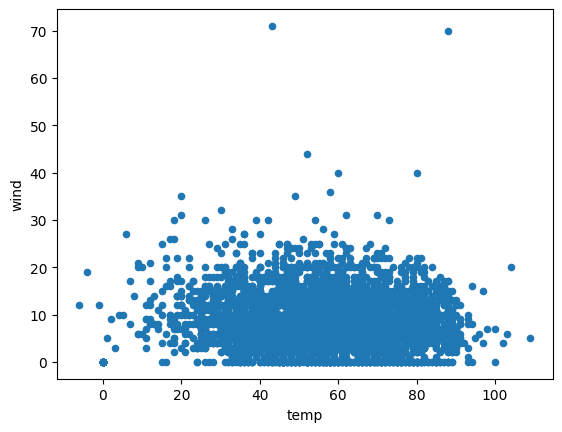

In [21]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [22]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,0.0,0,1,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,WAS,0.0,DAL,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,1,0.0,0.0,0,0,-46.5,0,-5.5
6967,MIN,0.0,DET,0.0,Home,0.0,0.0,0.0,7,6,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5
6969,JAX,0.0,IND,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,1,0.0,0.0,0,0,-46.5,0,-2.0
6970,SEA,0.0,LA,0.0,Home,0.0,0.0,0.0,10,7,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5


In [23]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0.0,0,0,80.0,12.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,0.0,1,0,78.0,12.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0.0,0,0,67.0,10.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0.0,0,0,76.0,8.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,0.0,1,0,73.0,5.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,MIA,0.0,NYJ,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-45.0,0,-3.0
6974,NYG,0.0,PHI,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-43.0,0,-5.0
6975,CIN,0.0,PIT,0.0,Home,0.0,0.0,0.0,7,11,...,-108.0,1,0,0.0,0.0,0,0,-43.5,1,1.0
6976,NO,0.0,TB,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,0,0.0,0.0,0,0,-43.0,0,-2.5


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [25]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [26]:
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3900887543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [28]:
X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
447,10,13,0,0.352658,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,1.146074,...,0.608202,0.780441,0.929384,1.313709,1,0.0,0.0,0.946764,-0.948974,-0.140239
5603,20,8,0,1.072966,-0.256272,-0.213843,-0.221009,0.431987,-0.322611,0.203222,...,0.717730,-0.677815,-0.590613,-0.761203,1,0.0,0.0,0.946764,1.053769,1.074436
4346,7,20,0,1.144997,-0.256272,-0.213843,3.088634,0.794633,-0.703906,0.717505,...,-0.487084,-0.677815,-0.575998,-0.761203,1,0.0,0.0,0.946764,1.053769,0.917704
1225,1,7,0,0.136565,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.117508,...,-0.706141,0.780441,0.929384,-0.761203,1,0.0,0.0,0.946764,1.053769,0.094859
6925,32,11,0,-0.151558,-0.256272,-0.213843,-0.221009,0.288616,-0.215848,0.117508,...,-0.706141,-0.718701,-0.678305,-0.761203,1,0.0,0.0,-1.056230,-0.948974,-0.218605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,11,13,0,-2.168420,-0.256272,3.303461,-0.221009,-0.854139,0.855590,-0.911059,...,-0.158498,2.184183,-0.736767,1.313709,1,0.0,0.0,-1.056230,-0.948974,-1.942660
3259,30,5,0,-0.583743,-0.256272,-0.213843,-0.693816,0.621744,-0.517071,0.546077,...,-0.158498,2.143298,-0.678305,-0.761203,1,0.0,0.0,-1.056230,-0.948974,-0.884717
6716,18,11,0,-0.151558,-0.256272,-0.213843,-0.221009,0.364518,-0.299733,0.117508,...,-0.487084,-0.718701,-0.678305,1.313709,1,0.0,0.0,-1.056230,-0.948974,-0.218605
3637,26,4,0,0.208596,-0.256272,-0.716315,1.197409,1.709680,-1.748654,1.403216,...,-0.377555,-0.650558,-0.605229,1.313709,1,0.0,0.0,0.946764,-0.948974,-0.414520


In [29]:
X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.073004,0.026185,-0.058926,0.001523,-0.035741,0.004900,0.007647,-0.011912,-0.040158,...,-0.013419,-0.025712,0.002917,0.034615,NaN,NaN,NaN,-0.069161,-0.059879,-0.045759
home_team,-0.073004,1.000000,0.055104,0.032113,-0.031010,0.041657,-0.004688,-0.037469,0.044115,0.077480,...,0.016322,0.044306,0.115835,0.001004,NaN,NaN,NaN,0.028270,0.000973,-0.000480
location,0.026185,0.055104,1.000000,-0.043929,0.022303,0.188677,0.182390,-0.027237,0.025706,-0.045794,...,0.045705,0.002998,-0.034568,-0.057574,NaN,NaN,NaN,-0.051810,-0.013742,-0.026863
home_winning_margin,-0.058926,0.032113,-0.043929,1.000000,-0.040507,0.010406,0.039043,0.312831,-0.300301,0.395023,...,0.039830,0.010097,0.010938,0.006561,NaN,NaN,NaN,0.759936,0.665111,0.907523
overtime,0.001523,-0.031010,0.022303,-0.040507,1.000000,0.024388,-0.014834,0.033541,-0.019917,0.011074,...,0.016714,0.015534,0.001586,0.030079,NaN,NaN,NaN,-0.010815,-0.098568,-0.049139
away_rest,-0.035741,0.041657,0.188677,0.010406,0.024388,1.000000,0.301975,0.022263,-0.018868,0.033977,...,0.027690,-0.028324,-0.041787,-0.037884,NaN,NaN,NaN,0.034852,0.007483,-0.004211
home_rest,0.004900,-0.004688,0.182390,0.039043,-0.014834,0.301975,1.000000,0.069118,-0.061724,0.082614,...,0.069845,0.013738,-0.042024,-0.084456,NaN,NaN,NaN,0.043715,0.006488,0.004714
away_moneyline,0.007647,-0.037469,-0.027237,0.312831,0.033541,0.022263,0.069118,1.000000,-0.969450,0.824380,...,0.024698,0.000558,-0.085968,-0.001683,NaN,NaN,NaN,0.299175,-0.097871,-0.036495
home_moneyline,-0.011912,0.044115,0.025706,-0.300301,-0.019917,-0.018868,-0.061724,-0.969450,1.000000,-0.784625,...,-0.024417,0.027821,0.120095,0.012334,NaN,NaN,NaN,-0.274187,0.080771,0.031954
spread_line,-0.040158,0.077480,-0.045794,0.395023,0.011074,0.033977,0.082614,0.824380,-0.784625,1.000000,...,0.041528,0.073032,0.012124,0.007815,NaN,NaN,NaN,0.352601,-0.086671,-0.027350


In [30]:
y_train

447     0
5603    0
4346    0
1225    0
6925    0
       ..
3063    0
3259    0
6716    0
3637    1
1558    1
Name: over_totals_win, Length: 1376, dtype: int32

In [31]:
X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,total_line,under_odds,over_odds,div_game,indoor_game,temp,wind,home_win,home_spread_win,home_spread_winning_margin
5588,5,5,0,-0.439681,-0.256272,-0.213843,-0.221009,0.254881,-0.139589,0.031794,...,-0.706141,-0.691444,-0.575998,1.313709,1,0.0,0.0,-1.056230,-0.948974,-0.492886
2576,1,15,0,0.136565,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.117508,...,1.265373,0.780441,0.929384,1.313709,1,0.0,0.0,0.946764,1.053769,0.094859
4918,27,8,0,-0.367650,-0.256272,3.303461,-0.221009,-2.216168,1.873648,-2.196767,...,0.279616,-0.636929,-0.619844,-0.761203,1,0.0,0.0,-1.056230,1.053769,0.604239
5223,11,13,0,0.352658,-0.256272,1.293573,-0.221009,0.541624,-0.433187,0.288935,...,0.608202,-0.718701,-0.546767,1.313709,1,0.0,0.0,0.946764,1.053769,0.251592
639,4,20,0,2.297490,-0.256272,-0.213843,3.088634,-0.234268,0.348468,2.688924,...,0.279616,0.780441,0.929384,1.313709,1,0.0,0.0,0.946764,1.053769,1.270351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,25,18,0,-0.079527,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.203222,...,-1.144255,0.780441,0.929384,1.313709,1,0.0,0.0,0.946764,-0.948974,-0.179422
6955,18,15,0,-0.151558,-0.256272,-0.213843,-0.693816,0.313917,-0.242539,0.031794,...,-0.596612,-0.718701,-0.678305,-0.761203,1,0.0,0.0,-1.056230,-0.948974,-0.179422
635,19,8,0,-0.367650,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.117508,...,-0.377555,0.780441,0.929384,1.313709,1,0.0,0.0,-1.056230,-0.948974,-0.453703
89,6,8,0,1.361089,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,1.488930,...,-0.377555,0.780441,0.929384,-0.761203,1,0.0,0.0,0.946764,1.053769,0.800155


In [32]:
y_test

5588    1
2576    1
4918    0
5223    0
639     1
       ..
54      1
6955    0
635     1
89      0
6033    0
Name: over_totals_win, Length: 344, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test)) 

0.5465116279069767


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

print('Indoor Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Indoor Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Indoor Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Indoor Accuracy: 0.55
Indoor Precision: 0.56
Indoor Recall: 0.40
